# FinTech Vendor Scorecard for Micro-Lending


In [ ]:
# Importing Libraies
import pandas as pd
from datasets import Features, Value, ClassLabel

## Loading data

In [ ]:
df = pd.read_csv('/content/telegram_data_processed.csv')
print(df.head())

      Channel Title Channel Username     ID    Sender Message  \
0  AwasMart-አዋስማርት🎁        @AwasMart  11892  AwasMart     NaN   
1  AwasMart-አዋስማርት🎁        @AwasMart  11891  AwasMart     NaN   
2  AwasMart-አዋስማርት🎁        @AwasMart  11890  AwasMart     NaN   
3  AwasMart-አዋስማርት🎁        @AwasMart  11889  AwasMart     NaN   
4  AwasMart-አዋስማርት🎁        @AwasMart  11888  AwasMart     NaN   

                        Date  Views Cleaned_Message Tokens  
0  2025-06-27 16:32:23+00:00  856.0             NaN     []  
1  2025-06-27 16:32:23+00:00  862.0             NaN     []  
2  2025-06-27 16:32:23+00:00  862.0             NaN     []  
3  2025-06-27 16:32:23+00:00  862.0             NaN     []  
4  2025-06-27 16:32:23+00:00  860.0             NaN     []  


In [ ]:
features = Features({
    "tokens": [Value(dtype='string')],
    "ner_tags": [ClassLabel(names=['O', 'B-Product', 'I-Product', 'B-PRICE', 'I-PRICE', 'B-LOC', 'I-LOC'])]
})

def parse_conll(file_path):
    """Parses a CoNLL file into a list of examples."""
    data = []
    tokens = []
    ner_tags = []
    # Get the ClassLabel object from the list
    ner_tag_feature = features["ner_tags"][0]
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            line = line.strip()
            if line:
                parts = line.split()
                tokens.append(parts[0])

                tag = parts[-1]
                if tag in ner_tag_feature.names:
                    ner_tags.append(tag)
                else:
                     ner_tags.append('O')
            elif tokens:
                if len(tokens) == len(ner_tags):
                    data.append({"tokens": tokens, "ner_tags": ner_tags})
                else:
                    print(f"Skipping malformed example with {len(tokens)} tokens and {len(ner_tags)} tags.")
                tokens = []
                ner_tags = []
        if tokens and len(tokens) == len(ner_tags):
             data.append({"tokens": tokens, "ner_tags": ner_tags})
        elif tokens:
             print(f"Skipping malformed final example with {len(tokens)} tokens and {len(ner_tags)} tags.")
    return data

conll_sentences = parse_conll('/content/telegram_data_conll.txt')

print(conll_sentences[0])


{'tokens': ['sayona', 'hand', 'mixer', 'power', '500watt', 'mixer', 'with', 'blender', '5', 'speeds', 'turbo', 'stainless', 'steel', 'blade', 'ዋጋ', '2400', 'ብር', 'በቴሌግራም', 'ለማዘዝ', 'wamrt1', 'wamrt2', 'አድራሻችን', '1', 'ሜክሲኮ', 'አልሳም', 'አፓርታማ', 'ግራውንድ', 'ቁ', '29', '2', 'ቦሌ', 'መድሀኔአለም', 'ቦሌ', 'መሰናዶ', 'ት', 'ቤት', 'ፊትለፊት', 'አለምነሽ', 'ፕላዛ', 'ግራውንድ', 'ሱቅ', 'ቁጥር', '05', '251941661030', '251943190237', 'ለወዳጅዎ', 'ስላጋሩ', 'እናመሰግናለን', 'ቴሌግራም', 'ቻናል', 't', 'me', 'awasmart'], 'ner_tags': ['O', 'B-Product', 'I-Product', 'I-Product', 'O', 'B-Product', 'O', 'B-Product', 'O', 'O', 'O', 'B-Product', 'I-Product', 'I-Product', 'B-PRICE', 'I-PRICE', 'I-PRICE', 'O', 'O', 'O', 'O', 'B-LOC', 'O', 'B-LOC', 'I-LOC', 'I-LOC', 'I-LOC', 'O', 'O', 'O', 'B-LOC', 'I-LOC', 'I-LOC', 'I-LOC', 'O', 'O', 'B-LOC', 'I-LOC', 'I-LOC', 'I-LOC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']}


In [ ]:
# Convert the list of dictionaries into a Pandas DataFrame
df_conll = pd.DataFrame(conll_sentences)

# Print the head of the new DataFrame to verify
print(df_conll.head())

                                              tokens  \
0  [sayona, hand, mixer, power, 500watt, mixer, w...   
1  [tempered, glass, bakeware, set, 3pcs, የመስታዎት,...   
2  [tempered, glass, bakeware, set, 3pcs, የመስታዎት,...   
3                             [foot, bath, massager]   
4  [foot, bath, massager, ለእግሮቻችን, ተጨማሪ, ውበት, የሚያ...   

                                            ner_tags  
0  [O, B-Product, I-Product, I-Product, O, B-Prod...  
1  [B-Product, I-Product, I-Product, O, O, B-Prod...  
2  [B-Product, I-Product, I-Product, O, O, B-Prod...  
3                          [O, B-Product, I-Product]  
4  [O, B-Product, I-Product, O, O, O, O, O, O, O,...  


## Cleaning Data

In [ ]:
# Drop rows if Cleaned_Message is NAN
df.dropna(subset=['Cleaned_Message'], inplace=True)
print(df.head())

       Channel Title Channel Username     ID    Sender  \
8   AwasMart-አዋስማርት🎁        @AwasMart  11884  AwasMart   
9   AwasMart-አዋስማርት🎁        @AwasMart  11883  AwasMart   
10  AwasMart-አዋስማርት🎁        @AwasMart  11882  AwasMart   
11  AwasMart-አዋስማርት🎁        @AwasMart  11881  AwasMart   
13  AwasMart-አዋስማርት🎁        @AwasMart  11879  AwasMart   

                                              Message  \
8   📊📊📊📊📊📊📊📊📊📊📊📊\n❇️ Sayona Hand mixer\n\n👉Power:-...   
9   ❇️Tempered glass bakeware set 3pcs\nየመስታዎት ፓትራ...   
10  ❇️Tempered glass bakeware set 3pcs\nየመስታዎት ፓትራ...   
11                               ❇️Foot Bath Massager   
13  ❇️Foot Bath Massager \n\n✔️ ለእግሮቻችን ተጨማሪ ውበት \...   

                         Date   Views  \
8   2025-06-27 16:31:45+00:00   865.0   
9   2025-06-27 12:35:19+00:00  1315.0   
10  2025-06-27 12:35:19+00:00  1247.0   
11  2025-06-27 07:39:41+00:00  1643.0   
13  2025-06-27 07:39:41+00:00  1568.0   

                                      Cleaned_Message  \
8   

In [ ]:
# Change Date to datetime format
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
# Change views data type from float to integer
df['Views'] = df['Views'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3007 entries, 8 to 4998
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   Channel Title     3007 non-null   object             
 1   Channel Username  3007 non-null   object             
 2   ID                3007 non-null   int64              
 3   Sender            3007 non-null   object             
 4   Message           3007 non-null   object             
 5   Date              3007 non-null   datetime64[ns, UTC]
 6   Views             3007 non-null   int64              
 7   Cleaned_Message   3007 non-null   object             
 8   Tokens            3007 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(2), object(6)
memory usage: 234.9+ KB


## Merge datasets

In [28]:
# Rename df Tokens to tokens
df.rename(columns={'Tokens': 'tokens'}, inplace=True)

In [ ]:
# Convert the list of tokens to a string representation for merging and convert to lowercase
df['tokens_str'] = df['tokens'].apply(lambda x: str(x).lower())
df_conll['tokens_str'] = df_conll['tokens'].apply(lambda x: str(x).lower())

# Merge the two dataframes on the new string representation of the 'tokens' column
merged_df = pd.merge(df, df_conll, on='tokens_str', how='left', suffixes=('_df', '_conll'))

# Drop the temporary 'tokens_str' columns
merged_df.drop(columns=['tokens_str'], inplace=True)

# Display the head of the merged dataframe
print(merged_df.head())

      Channel Title Channel Username     ID    Sender  \
0  AwasMart-አዋስማርት🎁        @AwasMart  11884  AwasMart   
1  AwasMart-አዋስማርት🎁        @AwasMart  11883  AwasMart   
2  AwasMart-አዋስማርት🎁        @AwasMart  11882  AwasMart   
3  AwasMart-አዋስማርት🎁        @AwasMart  11881  AwasMart   
4  AwasMart-አዋስማርት🎁        @AwasMart  11881  AwasMart   

                                             Message  \
0  📊📊📊📊📊📊📊📊📊📊📊📊\n❇️ Sayona Hand mixer\n\n👉Power:-...   
1  ❇️Tempered glass bakeware set 3pcs\nየመስታዎት ፓትራ...   
2  ❇️Tempered glass bakeware set 3pcs\nየመስታዎት ፓትራ...   
3                               ❇️Foot Bath Massager   
4                               ❇️Foot Bath Massager   

                       Date  Views  \
0 2025-06-27 16:31:45+00:00    865   
1 2025-06-27 12:35:19+00:00   1315   
2 2025-06-27 12:35:19+00:00   1247   
3 2025-06-27 07:39:41+00:00   1643   
4 2025-06-27 07:39:41+00:00   1643   

                                     Cleaned_Message  \
0  Sayona Hand mixer\n\nPower  500w

## Extract Price

In [30]:
# Extract price
def extract_price_from_ner(row):
    """
    Extracts the numeric price from tokens based on NER tags.
    """
    tokens = row['tokens_conll']
    ner_tags = row['ner_tags']
    price_tokens = []
    if isinstance(tokens, list) and isinstance(ner_tags, list):
        for token, tag in zip(tokens, ner_tags):
            if tag in ['B-PRICE', 'I-PRICE']:
                price_tokens.append(token)
            elif price_tokens:
                # Stop if a non-price tag is encountered after price tokens
                break
    if price_tokens:
        # Join the price tokens and extract only digits
        price_str = ''.join(price_tokens)
        numeric_price = ''.join(filter(str.isdigit, price_str))
        return numeric_price if numeric_price else None
    return None

# Apply the function to create a new 'Extracted_Price' column in merged_df
merged_df['Extracted_Price'] = merged_df.apply(extract_price_from_ner, axis=1)

# Display the head of the merged dataframe with the new column
display(merged_df.head())

,Channel Title,Channel Username,ID,Sender,Message,Date,Views,Cleaned_Message,tokens_df,tokens_conll,ner_tags,Extracted_Price
0,AwasMart-አዋስማርት🎁,@AwasMart,11884,AwasMart,📊📊📊📊📊📊📊📊📊📊📊📊\n❇️ Sayona Hand mixer\n\n👉Power:-...,2025-06-27 16:31:45+00:00,865,Sayona Hand mixer\n\nPower 500watt\nMixer wit...,"['Sayona', 'Hand', 'mixer', 'Power', '500watt'...","[sayona, hand, mixer, power, 500watt, mixer, w...","[O, B-Product, I-Product, I-Product, O, B-Prod...",2400
1,AwasMart-አዋስማርት🎁,@AwasMart,11883,AwasMart,❇️Tempered glass bakeware set 3pcs\nየመስታዎት ፓትራ...,2025-06-27 12:35:19+00:00,1315,Tempered glass bakeware set 3pcs\nየመስታዎት ፓትራዎች...,"['Tempered', 'glass', 'bakeware', 'set', '3pcs...","[tempered, glass, bakeware, set, 3pcs, የመስታዎት,...","[B-Product, I-Product, I-Product, O, O, B-Prod...",None
2,AwasMart-አዋስማርት🎁,@AwasMart,11882,AwasMart,❇️Tempered glass bakeware set 3pcs\nየመስታዎት ፓትራ...,2025-06-27 12:35:19+00:00,1247,Tempered glass bakeware set 3pcs\nየመስታዎት ፓትራዎች...,"['Tempered', 'glass', 'bakeware', 'set', '3pcs...","[tempered, glass, bakeware, set, 3pcs, የመስታዎት,...","[B-Product, I-Product, I-Product, O, O, B-Prod...",3700
3,AwasMart-አዋስማርት🎁,@AwasMart,11881,AwasMart,❇️Foot Bath Massager,2025-06-27 07:39:41+00:00,1643,Foot Bath Massager,"['Foot', 'Bath', 'Massager']","[foot, bath, massager]","[O, B-Product, I-Product]",None
4,AwasMart-አዋስማርት🎁,@AwasMart,11881,AwasMart,❇️Foot Bath Massager,2025-06-27 07:39:41+00:00,1643,Foot Bath Massager,"['Foot', 'Bath', 'Massager']","[foot, bath, massager]","[O, B-Product, I-Product]",None


In [ ]:
# Convert the 'Extracted_Price' column to int
merged_df['Extracted_Price'] = pd.to_numeric(merged_df['Extracted_Price'], errors='coerce').fillna(0).astype(int)

In [32]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9139 entries, 0 to 9138
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   Channel Title     9139 non-null   object             
 1   Channel Username  9139 non-null   object             
 2   ID                9139 non-null   int64              
 3   Sender            9139 non-null   object             
 4   Message           9139 non-null   object             
 5   Date              9139 non-null   datetime64[ns, UTC]
 6   Views             9139 non-null   int64              
 7   Cleaned_Message   9139 non-null   object             
 8   tokens_df         9139 non-null   object             
 9   tokens_conll      9139 non-null   object             
 10  ner_tags          9139 non-null   object             
 11  Extracted_Price   9139 non-null   int64              
dtypes: datetime64[ns, UTC](1), int64(3), object(8)
memory usage: 8

In [ ]:
# Get unique channel usernames
unique_channels = merged_df['Channel Username'].unique()

# Loop through unique channels and apply the filter
for channel in unique_channels:
    # Apply the filter to remove rows where Channel Username is the current channel
    # and Extracted_Price is greater than 20000
    merged_df = merged_df[~((merged_df['Channel Username'] == channel) & (merged_df['Extracted_Price'] > 20000))]

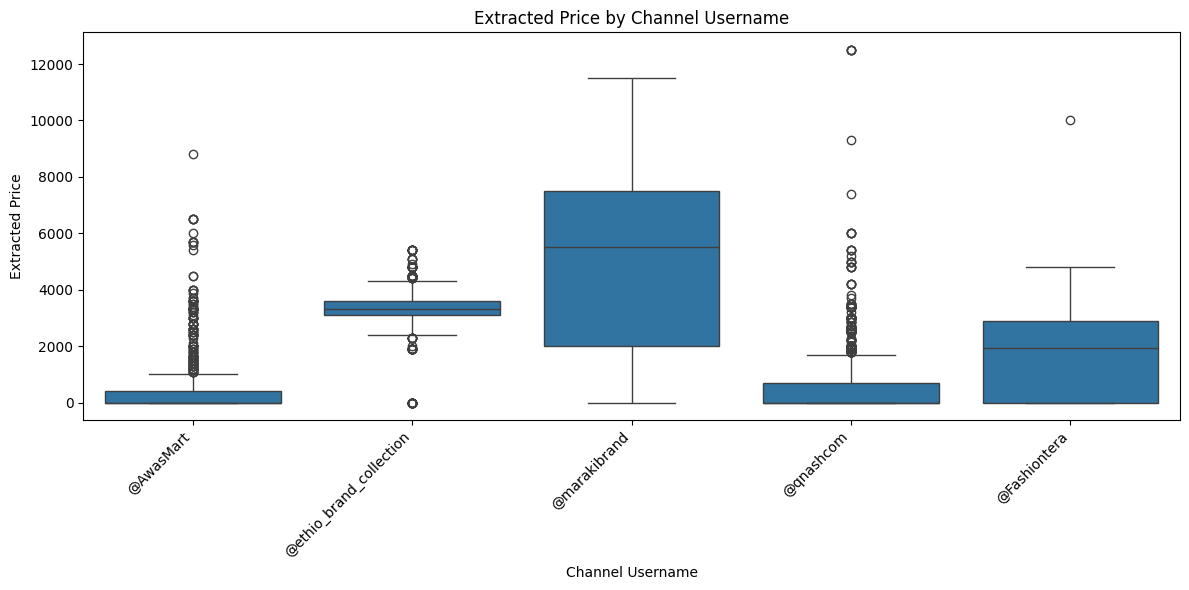

In [ ]:
# Plot box plot of the Channel Username vs Extracted_Price

import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the box plot
plt.figure(figsize=(12, 6)) # Adjust figure size as needed
sns.boxplot(x='Channel Username', y='Extracted_Price', data=merged_df)
plt.title('Extracted Price by Channel Username')
plt.xlabel('Channel Username')
plt.ylabel('Extracted Price')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels if they overlap
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

## Calculate Key Vendor Metrics

### Activity & Consistency: Posting Frequency


In [ ]:
# Group by 'Channel Username'
grouped_channels = merged_df.groupby('Channel Username')

In [36]:
# Calculate the number of posts and time span in weeks for each channel
def calculate_posting_metrics(group):
    time_span_days = (group['Date'].max() - group['Date'].min()).days
    # Avoid division by zero if only one post
    time_span_weeks = time_span_days / 7 if time_span_days > 0 else 0
    num_posts = len(group)
    return pd.Series({
        'Number of Posts': num_posts,
        'Time Span (Weeks)': time_span_weeks
    })

posting_metrics = grouped_channels.apply(calculate_posting_metrics).round(2)

# Display the calculated metrics
display(posting_metrics)

/tmp/ipython-input-36-3256942983.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  posting_metrics = grouped_channels.apply(calculate_posting_metrics).round(2)


,Number of Posts,Time Span (Weeks)
Channel Username,,
@AwasMart,922.0,14.14
@Fashiontera,671.0,186.57
@ethio_brand_collection,2527.0,95.57
@marakibrand,603.0,45.86
@qnashcom,4308.0,66.29


In [37]:
# Calculate average posts per week
posting_frequency = posting_metrics.apply(
    lambda row: row['Number of Posts'] / row['Time Span (Weeks)'] if row['Time Span (Weeks)'] > 0 else 0,
    axis=1
).reset_index(name='Average Posts per Week').round(2)


# Display the result
display(posting_frequency)

,Channel Username,Average Posts per Week
0,@AwasMart,65.21
1,@Fashiontera,3.60
2,@ethio_brand_collection,26.44
3,@marakibrand,13.15
4,@qnashcom,64.99


### Market Reach & Engagement: Average Views per Post


In [38]:
# Calculate Average Views per Post for each channel
average_views = merged_df.groupby('Channel Username')['Views'].mean().reset_index(name='Average Views per Post').round(2)
display(average_views)

,Channel Username,Average Views per Post
0,@AwasMart,3550.49
1,@Fashiontera,10482.48
2,@ethio_brand_collection,39925.83
3,@marakibrand,11112.69
4,@qnashcom,19116.60


### Market Reach & Engagement: Top Performing Post

In [39]:
# Find the top performing post (highest views) for each channel
top_posts = merged_df.loc[merged_df.groupby('Channel Username')['Views'].idxmax()]

# Select relevant columns for the output
top_posts = top_posts[['Channel Username', 'ID', 'Views', 'Cleaned_Message', 'Extracted_Price']]

# Rename columns for clarity
top_posts.rename(columns={'Cleaned_Message': 'Message Content', 'Extracted_Price': 'Price'}, inplace=True)

# Display the top performing posts
display(top_posts)

,Channel Username,ID,Views,Message Content,Price
892,@AwasMart,10877,4894,Canye Electronic mosquito coil liquid killer\n...,700
9118,@Fashiontera,2686,40998,ፋሽን ተራ /Fashion Tera\n \nአድራሻ፡ አዲስ አበ...,0
1589,@ethio_brand_collection,5877,57150,Puma beige SD\n414243\nPrice 3700 birr\nአድራሻ ሜ...,3700
3692,@marakibrand,11598,21755,Airforce Boots ™ \nMade In Vietnam \n\n #41 #4...,5500
5442,@qnashcom,4422,40772,Table Place Mats\n\n ከፍተኛ ጥራት\n waterproof \n ...,6


### Business Profile: Average Price Point


In [40]:
# Calculate the average price point for each channel
average_price = merged_df.groupby('Channel Username')['Extracted_Price'].mean().reset_index(name='Average Price').round(2)

# Display the result
display(average_price)

,Channel Username,Average Price
0,@AwasMart,497.57
1,@Fashiontera,1685.03
2,@ethio_brand_collection,3377.84
3,@marakibrand,5086.90
4,@qnashcom,479.62


### Lending Score

In [41]:
# Merge the average_views and posting_frequency dataframes
lending_score_df = pd.merge(average_views, posting_frequency, on='Channel Username')

# Calculate the Lending Score using the specified formula
lending_score_df['Lending Score'] = ((lending_score_df['Average Views per Post'] * 0.5) + (lending_score_df['Average Posts per Week'] * 0.5)).round(2)

# Display the result
display(lending_score_df)

,Channel Username,Average Views per Post,Average Posts per Week,Lending Score
0,@AwasMart,3550.49,65.21,1807.85
1,@Fashiontera,10482.48,3.60,5243.04
2,@ethio_brand_collection,39925.83,26.44,19976.14
3,@marakibrand,11112.69,13.15,5562.92
4,@qnashcom,19116.60,64.99,9590.80


## Vendor Scorecard

Here is a summary table comparing the vendors across the calculated metrics:

In [42]:
# Merge with average_price
vendor_scorecard = pd.merge(lending_score_df, average_price, on='Channel Username') # Note: Using Channel Username as key

# Select and rename columns for the final report
vendor_scorecard = vendor_scorecard[['Channel Username', 'Average Views per Post', 'Average Posts per Week', 'Average Price', 'Lending Score']]
vendor_scorecard.rename(columns={
    'Average Views per Post': 'Avg. Views/Post',
    'Average Posts per Week': 'Posts/Week',
    'Average Price': 'Avg. Price (ETB)'
}, inplace=True)

# Display the vendor scorecard
display(vendor_scorecard)

,Channel Username,Avg. Views/Post,Posts/Week,Avg. Price (ETB),Lending Score
0,@AwasMart,3550.49,65.21,497.57,1807.85
1,@Fashiontera,10482.48,3.60,1685.03,5243.04
2,@ethio_brand_collection,39925.83,26.44,3377.84,19976.14
3,@marakibrand,11112.69,13.15,5086.90,5562.92
4,@qnashcom,19116.60,64.99,479.62,9590.80


The vendor scorecard shows key metrics for different Telegram channels:

*   **@ethio_brand_collection** has the highest average views per post and the highest lending score.
*   **@AwasMart** and **@qnashcom** have the highest posting frequency.

*   **@marakibrand** has the highest average price point.
*   **@Fashiontera** has a moderate average views per post and a lower posting frequency compared to some others.

